In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm

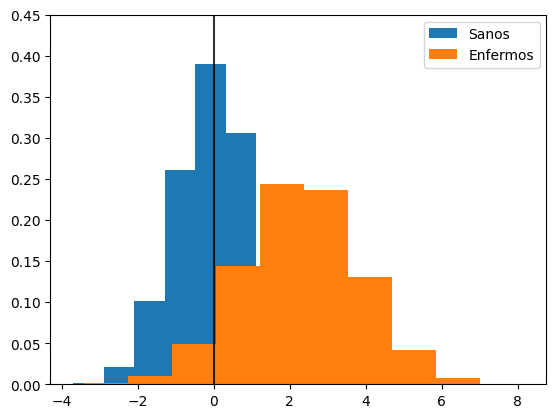

In [3]:
mu_1 = 0
sigma_1 = 1

mu_2 = 2.3
sigma_2 = 1.5


N = 10000


dist_1 = norm(loc=mu_1, scale=sigma_1)
dist_2 = norm(loc=mu_2, scale=sigma_2)

datos_1 = dist_1.rvs(N)
datos_2 = dist_2.rvs(N)

frontera = 0

boundary = 0
plt.figure()
plt.hist(datos_1, density=True, label="Sanos")
#plt.plot(x, f1.pdf(x))
plt.hist(datos_2, density=True, label="Enfermos")
plt.vlines(boundary, 0, 1, alpha=0.8,color='k')
#plt.plot(x, f2.pdf(x))
plt.ylim(0,0.45)
plt.legend()
plt.show()


In [5]:
random_1 = datos_1
random_2 = datos_2

In [6]:
VP = random_2>boundary   # predice 1 y es 1 enfermos
VN = random_1<boundary   # predice 0 y es 0 sanos

FP = random_1>boundary   # predice 1 y es 0, predice enfermo y es sano
FN = random_2<boundary  # predice 0 y es 1, predice sano y es enfermo

In [7]:
VN = (random_1<boundary).sum()
FP = (random_1>boundary).sum()
E = VN/(VN+FP)
E

0.496

In [8]:
VP = (random_2>boundary).sum()
FN = (random_2<boundary).sum()
S = VP/(VP+FN)
S

0.9357

In [9]:
VP = (random_2>boundary).sum()
VN = (random_1<boundary).sum()
exactitud = (VP+VN)/(2*N)
exactitud

0.71585

In [10]:
presicion=VP/(VP+FP)
presicion

0.6499270681391957

In [11]:
F1 = 2*presicion*S/(presicion+S)
F1

0.7670615239578636

In [15]:
boundary_=np.linspace(-4,8,100)
E_=[]
S_=[]
F1_=[]
for b in boundary_:
  VN = (random_1<b).sum()
  FP = (random_1>b).sum()
  E = VN/(VN+FP)
  E_.append(E)

  VP = (random_2>b).sum()
  FN = (random_2<b).sum()
  S = VP/(VP+FN)
  S_.append(S)



In [16]:
np.array(S_)

array([1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 9.999e-01,
       9.999e-01, 9.998e-01, 9.998e-01, 9.997e-01, 9.996e-01, 9.994e-01,
       9.991e-01, 9.990e-01, 9.987e-01, 9.981e-01, 9.977e-01, 9.971e-01,
       9.965e-01, 9.955e-01, 9.951e-01, 9.929e-01, 9.908e-01, 9.891e-01,
       9.869e-01, 9.833e-01, 9.810e-01, 9.768e-01, 9.707e-01, 9.644e-01,
       9.586e-01, 9.529e-01, 9.441e-01, 9.357e-01, 9.254e-01, 9.139e-01,
       9.000e-01, 8.853e-01, 8.686e-01, 8.507e-01, 8.310e-01, 8.110e-01,
       7.907e-01, 7.654e-01, 7.365e-01, 7.131e-01, 6.890e-01, 6.597e-01,
       6.309e-01, 5.992e-01, 5.688e-01, 5.357e-01, 5.038e-01, 4.684e-01,
       4.350e-01, 4.023e-01, 3.720e-01, 3.427e-01, 3.162e-01, 2.883e-01,
       2.585e-01, 2.321e-01, 2.108e-01, 1.891e-01, 1.671e-01, 1.471e-01,
       1.286e-01, 1.133e-01, 9.720e-02, 8.450e-02, 7.230e-02, 6.280e-02,
       5.420e-02, 4.510e-02, 3.630e-02, 2.970e-02, 2.390e-02, 2.040e-02,
       1.720e-02, 1.440e-02, 1.170e-02, 9.900e-03, 

Text(0, 0.5, 'S')

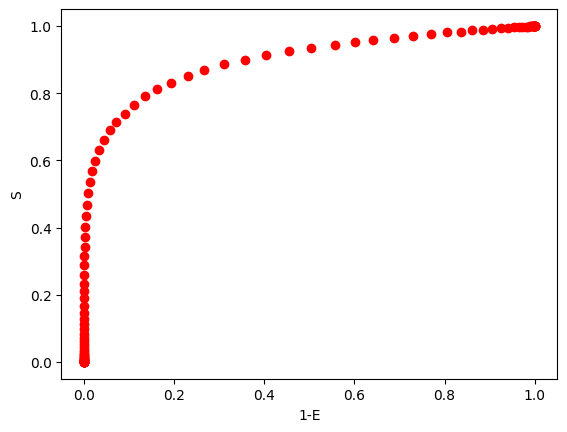

In [17]:
plt.plot( (1-np.array(E_)), np.array(S_),"ro")
plt.xlabel("1-E")
plt.ylabel("S")

In [ ]:
TN = (datos_1<frontera).sum()
FP = (datos_1>frontera).sum()

FN = (datos_2<frontera).sum()
TP = (datos_2>frontera).sum()

In [ ]:
len(datos_1),TN,FP

(10000, 4994, 5006)

In [ ]:
Especificidad = (TN)/(TN+FP)
Sensibilidad = (TP)/(TP+FN)
Exactitud = (TP+FN)/(2*N)
Presicion = (TP)/(TP+FP)


print("Especificidad: {:.3f}".format(Especificidad))
print("Sensibilidad: {:.3f}".format(Sensibilidad))
print("Exactitud: {:.3f}".format(Exactitud))
print("Presicion: {:.3f}".format(Presicion))

Especificidad: 0.499
Sensibilidad: 0.938
Exactitud: 0.500
Presicion: 0.652


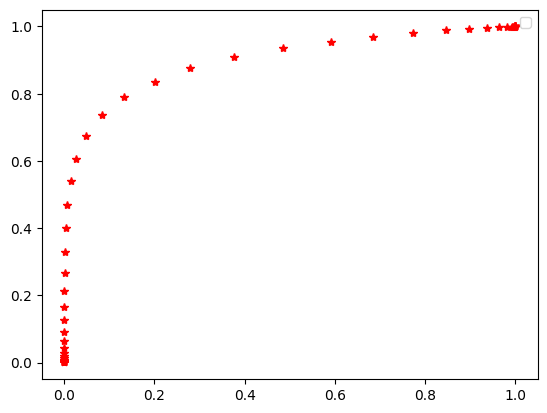

In [ ]:
Es = []
Sen = []
Ex = []
Pre = []

fronteras = np.linspace(-5,8,50)

for frontera in fronteras:
    TN = (datos_1<frontera).sum()
    FP = (datos_1>frontera).sum()

    FN = (datos_2<frontera).sum()
    TP = (datos_2>frontera).sum()

    Es.append((TN)/(TN+FP))
    Sen.append((TP)/(TP+FN))
    Ex.append((TP+FN)/(2*N))
    Pre.append((TP)/(TP+FP))


Es = np.array(Es)
Sen = np.array(Sen)
Ex = np.array(Ex)
Pre = np.array(Pre)

a = 25
b = 40
#plt.plot(1-Es[a:b],Sen[a:b],'r*')
plt.plot(1-Es,Sen,'r*')
plt.legend()
plt.show()

<ipython-input-7-d320552f4677>:4: RuntimeWarning: divide by zero encountered in double_scalars
  pendientes.append((Y[i + 1] - Y[i]) / (X[i + 1] - X[i]))


[3.049107142857132, 5.4552845528455425, 9.03797468354428, 23.17241379310422, 31.217391304346755, 88.14285714286682, 134.24999999997752, 237.0000000000261, -inf, -inf, -inf, -inf, -inf, -inf]


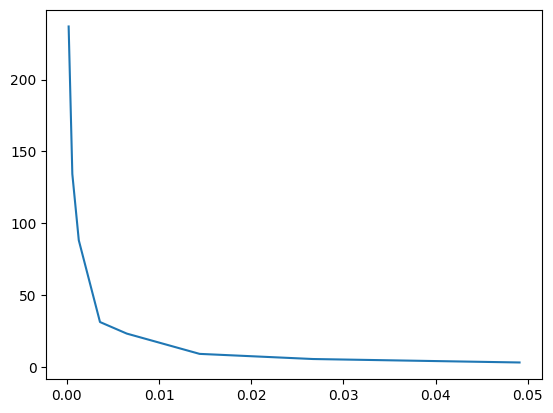

In [ ]:
def calcular_pendiente(X, Y):
    pendientes = []
    for i in range(len(X) - 1):
        pendientes.append((Y[i + 1] - Y[i]) / (X[i + 1] - X[i]))
    return pendientes

resultado_pendientes = calcular_pendiente(1-Es[a:b], Sen[a:b])
print(resultado_pendientes)
plt.plot(1-Es[a:b-1],resultado_pendientes)
plt.show()

In [ ]:
# plt.plot(fronteras,Es,label='TN')
# plt.plot(fronteras,Sen,label='FP')
# plt.plot(fronteras,Ex,label='FN')
# plt.plot(fronteras,Pre,label='TP')

# #plt.plot(1-Es,Sen,'r*')
# plt.legend()
# plt.show()